Imported Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump

## Step 1: Problem statement and data collection

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


1. `age`. Edad del cliente (numérico)
2. `job`. Tipo de trabajo (categórico)
3. `marital`. Estado civil (categórico)
4. `education`. Nivel de educación (categórico)
5. `default`. ¿Tiene crédito actualmente? (categórico)
6. `housing`. ¿Tiene un préstamo de vivienda? (categórico)
7. `loan`. ¿Tiene un préstamo personal? (categórico)
8. `contact`. Tipo de comunicación de contacto (categórico)
9. `month`. Último mes en el que se le ha contactado (categórico)
10. `day_of_week`. Último día en el que se le ha contactado (categórico)
11. `duration`. Duración del contacto previo en segundos (numérico)
12. `campaign`. Número de contactos realizados durante esta campaña al cliente (numérico)
13. `pdays`. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
14. `previous`. Número de contactos realizados durante la campaña anterior al cliente (numérico)
15. `poutcome`. Resultado de la campaña de marketing anterior (categórico)
16. `emp.var.rate`. Tasa de variación del empleo. Indicador trimestral (numérico)
17. `cons.price.idx`. Índice de precios al consumidor. Indicador mensual (numérico)
18. `cons.conf.idx`. Índice de confianza del consumidor. Indicador mensual (numérico)
19. `euribor3m`. Tasa EURIBOR 3 meses. Indicador diario (numérico)
20. `nr.employed`. Número de empleados. Indicador trimestral (numérico)
21. `y`. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

## Step 2: Exploration and data cleaning

### - 2.1 Summarize DF

In [3]:
# Obtain dimensions

rows, columns = df.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 41188 Rows and 21 Columns


In [4]:
# Obtain information about data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0] # Number of nulls in each variable.

num_of_null_var = len(null_var) # Number of variables with almost 1 null.

print(f"{null_var}\nAnd the number of null variables are {num_of_null_var}")

Series([], dtype: int64)
And the number of null variables are 0



- ### 2.2 Eliminate duplicates

`falta poner que son los duplicados`

In [6]:
# Obtain the number of duplicate values in our dataset

num_duplicate_values = df.duplicated().sum()

print(f"The number of duplicate values in the dataset is {num_duplicate_values}")

The number of duplicate values in the dataset is 12


In [7]:
# Hacemos una copia del dataset para trabajar sobre él y no dañar el original
# Dataset copy
filt_df = df.copy()

if num_duplicate_values:

    filt_df = filt_df.drop_duplicates()

print(filt_df.shape)

filt_df.head(3)


(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Obtain the number of duplicate values in our ¡FILTERED! dataset

num_duplicate_values = filt_df.duplicated().sum()

print(f"The number of duplicate values in the dataset is {num_duplicate_values}")

The number of duplicate values in the dataset is 0


- ### 2.3 Eliminate irrelevant information

In [9]:
# Eliminate irrelevant columns

filt_df.drop(["pdays", "age", "day_of_week", "housing", "loan", "marital"],
                    axis = "columns",
                        inplace = True)

filt_df.head(3)

,job,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,basic.4y,no,telephone,may,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,services,high.school,unknown,telephone,may,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,services,high.school,no,telephone,may,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Step 3: Analysis of univariate variables

- ### 3.1 Analysis of categorical variables

In [10]:
# Esto se puede hacer dependiendo de los datos y sabiendo de antemano que todas las variables categóricas son Dtype = 'object'
categorical_var = []

for column in filt_df: 

    if filt_df[column].dtype == 'object':

        categorical_var.append(column)


print(f"Categorical Variables are:\n{categorical_var}\n\nTotal = {len(categorical_var)}")

Categorical Variables are:
['job', 'education', 'default', 'contact', 'month', 'poutcome', 'y']

Total = 7


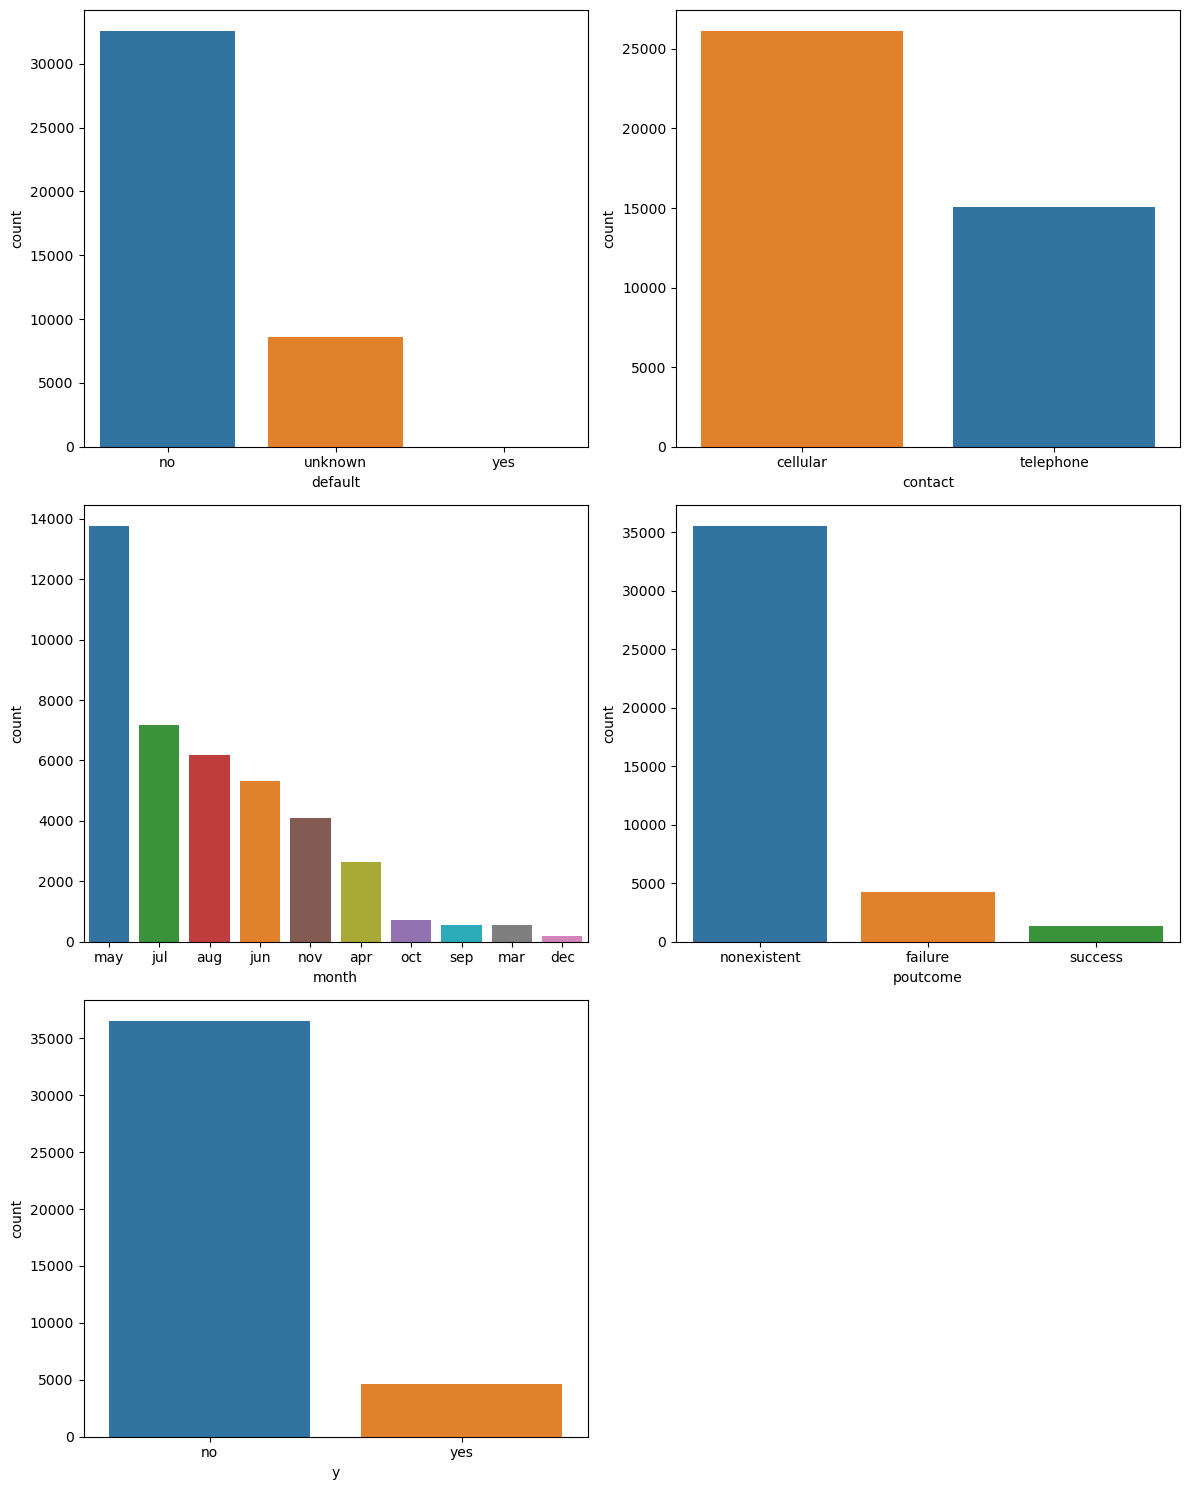

In [11]:
# Frecuency of each category and histogram

fig, axis = plt.subplots(3, 2, figsize = (12, 15))


# Create Histogram (Countplots)


sns.countplot(ax = axis[0, 0], # Variable 'default'
                data = filt_df,
                    x = "default",
                        hue = "default",
                            order = filt_df['default'].sort_values().value_counts().index)



sns.countplot(ax = axis[0, 1], # Variable 'contact'
                data = filt_df,
                    x = "contact",
                        hue = "contact",
                            order = filt_df['contact'].sort_values().value_counts().index)

sns.countplot(ax = axis[1, 0], # Variable 'month'
                data = filt_df, 
                    x = "month",
                        hue = "month",
                            order = filt_df['month'].sort_values().value_counts().index)



sns.countplot(ax = axis[1, 1], # Variable 'poutcome'
                data = filt_df,
                    x = "poutcome",
                        hue = "poutcome",
                            order = filt_df['poutcome'].sort_values().value_counts().index)

sns.countplot(ax = axis[2, 0], # Variable 'y' (target)
                data = filt_df, 
                    x = "y",
                        hue = "y",
                            order = filt_df['y'].sort_values().value_counts().index)

# Remove the empty axes
fig.delaxes(ax = axis[2,1])
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

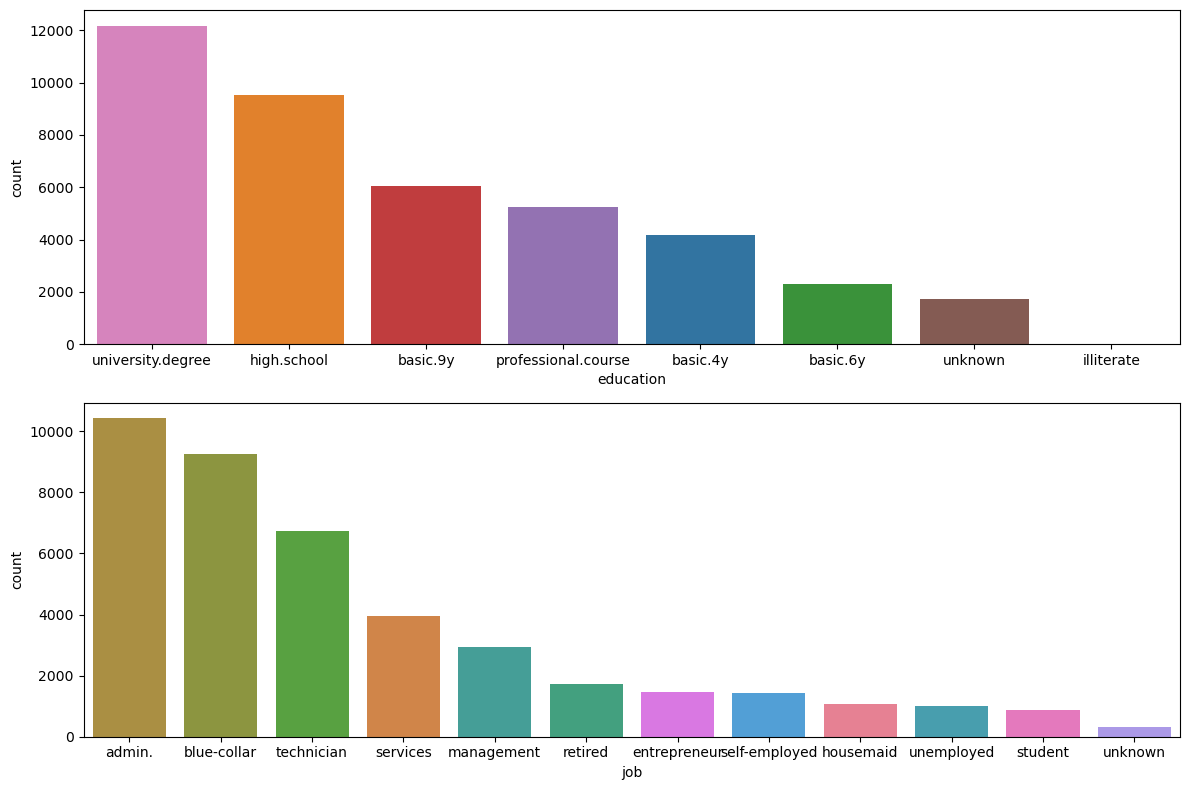

In [12]:
fig, axis = plt.subplots(2, 1, figsize = (12, 8))

sns.countplot(ax = axis[0], # Variable 'education'
                data = filt_df, 
                    x = "education",
                        hue = "education",
                            order = filt_df['education'].sort_values().value_counts().index)


sns.countplot(ax = axis[1], # Variable 'job'
                data = filt_df,
                    x = "job",
                        hue = "job",
                            order = filt_df['job'].sort_values().value_counts().index)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- ### 3.1 Analysis of numerical variables

In [13]:
# Esto se puede hacer dependiendo de los datos y sabiendo de antemano que todas las variables numéricas son Dtype = 'int' or 'float64'

numerical_var_int = []
numerical_var_float = []

for column in filt_df: 

    if (filt_df[column].dtype == 'int64') :

        numerical_var_int.append(column)

    elif (filt_df[column].dtype == 'float64'):

        numerical_var_float.append(column)

print('============================================')
print(f"Numerical (int) Variables are:\n\n{numerical_var_int}\n\nTotal = {len(numerical_var_int)}")
print('============================================')
print(f"Numerical (float64) Variables are:\n\n{numerical_var_float}\n\nTotal = {len(numerical_var_float)}")
print('============================================')

Numerical (int) Variables are:

['duration', 'campaign', 'previous']

Total = 3
Numerical (float64) Variables are:

['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Total = 5


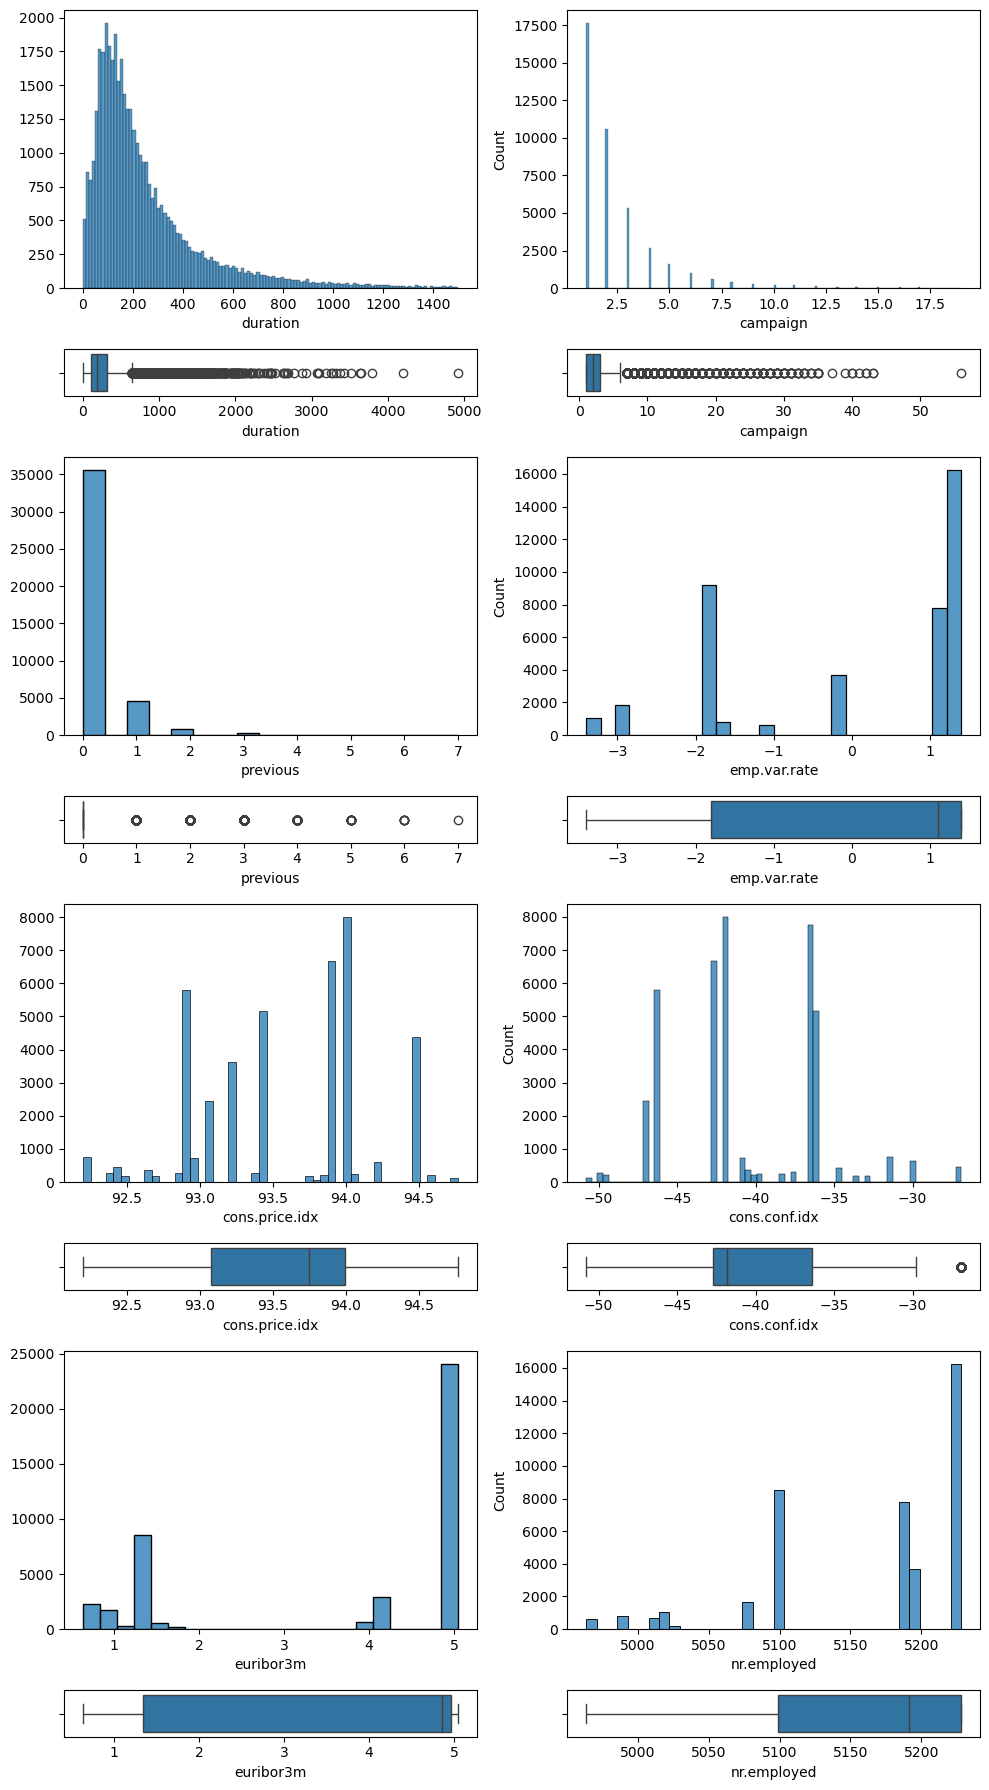

In [15]:
fig, axis = plt.subplots(8, 2,
                            figsize = (10, 18),
                                gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})


# ==========================Variable duration==========================
sns.histplot(ax = axis[0, 0],
                data = filt_df[filt_df['duration']<1500], # take values < 1500 because the rest of the values are scattered 
                    x = "duration").set(ylabel = None)

sns.boxplot(ax = axis[1, 0],
                data = filt_df,
                     x = "duration")


# ==========================Variable campaign==========================
sns.histplot(ax = axis[0, 1],
                data = filt_df[filt_df['campaign'] < 20], # take values < 20 because the rest of the values are scattered 
                     x = "campaign")

sns.boxplot(ax = axis[1, 1],
                data = filt_df, 
                     x = "campaign")


# ==========================Variable previous===========================
sns.histplot(ax = axis[2, 0],
                data = filt_df, 
                    x = "previous").set(ylabel = None)

sns.boxplot(ax = axis[3, 0],
                data = filt_df,
                    x = "previous")

#-------------------------flaot64------------------------------------------------------------------

# ==========================Variable emp.var.rate======================== 
sns.histplot(ax = axis[2, 1],
                data = filt_df, 
                    x = "emp.var.rate")

sns.boxplot(ax = axis[3, 1],
                data = filt_df,
                    x = "emp.var.rate")


# ==========================Variable cons.price.idx=======================
sns.histplot(ax = axis[4, 0],
                data = filt_df, # take values < 1500 because the rest of the values are scattered, 
                    x = "cons.price.idx").set(ylabel = None)

sns.boxplot(ax = axis[5, 0],
                data = filt_df,
                     x = "cons.price.idx")


# ==========================Variable cons.conf.idx========================
sns.histplot(ax = axis[4, 1],
                data = filt_df, 
                     x = "cons.conf.idx")

sns.boxplot(ax = axis[5, 1],
                data = filt_df, 
                     x = "cons.conf.idx")


# ==========================Variable euribor3m============================
sns.histplot(ax = axis[6, 0],
                data = filt_df, 
                    x = "euribor3m").set(ylabel = None)

sns.boxplot(ax = axis[7, 0],
                data = filt_df,
                    x = "euribor3m")

# ==========================Variable nr.employed==========================
sns.histplot(ax = axis[6, 1],
                data = filt_df, 
                     x = "nr.employed")

sns.boxplot(ax = axis[7, 1],
                data = filt_df, 
                     x = "nr.employed")


# Remove the empty axes
#fig.delaxes(ax = axis[8,1])
#fig.delaxes(ax = axis[9,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Step 4: Analysis of multivariate variables

- ### 4.4 From string to numerical transformation --> JSON saving

In [14]:
def encoding(dataset, variable, json_path):

    factorize = pd.factorize(dataset[variable])

    parsing_dict = {}

    indexes = factorize[1]

    set_factor = list(set(factorize[0]))

    for index in range(len(factorize[1])):
        parsing_dict.update({indexes[index]: int(set_factor[index])})

    with open(json_path, "w") as f:
        json.dump(parsing_dict, f)
        

In [15]:
# Encoding Variable 'job'
encoding(filt_df, "job", "../data/interim/transform_job.json")

# Encoding Variable 'education'
encoding(filt_df, "education", "../data/interim/transform_education.json")

# Encoding Variable 'default'
encoding(filt_df, "default", "../data/interim/transform_default.json")

# Encoding Variable 'contact'
encoding(filt_df, "contact", "../data/interim/transform_contact.json")

# Encoding Variable 'month'
encoding(filt_df, "month", "../data/interim/transform_month.json")

# Encoding Variable 'poutcome'
encoding(filt_df, "poutcome", "../data/interim/transform_poutcome.json")

# Encoding Variable 'y'
encoding(filt_df, "y", "../data/interim/transform_y.json")

In [18]:
def open_encoded_var(dataset, variable, json_path):

    with open(json_path, "r") as f:
        job_dict = json.load(f)

    dataset[variable] = dataset[variable].apply(lambda x: job_dict.get(x))

In [19]:
# Open Variable 'job'
open_encoded_var(filt_df, "job", "../data/interim/transform_job.json")

# Open Variable 'education'
open_encoded_var(filt_df, "education", "../data/interim/transform_education.json")

# Open Variable 'default'
open_encoded_var(filt_df, "default", "../data/interim/transform_default.json")

# Open Variable 'contact'
open_encoded_var(filt_df, "contact", "../data/interim/transform_contact.json")

# Open Variable 'month'
open_encoded_var(filt_df, "month", "../data/interim/transform_month.json")

# Open Variable 'poutcome'
open_encoded_var(filt_df, "poutcome", "../data/interim/transform_poutcome.json")

# Open Variable 'y'
open_encoded_var(filt_df, "y", "../data/interim/transform_y.json")


- ### 4.5 Correlation matrix (Numerical-Categorical analysis)

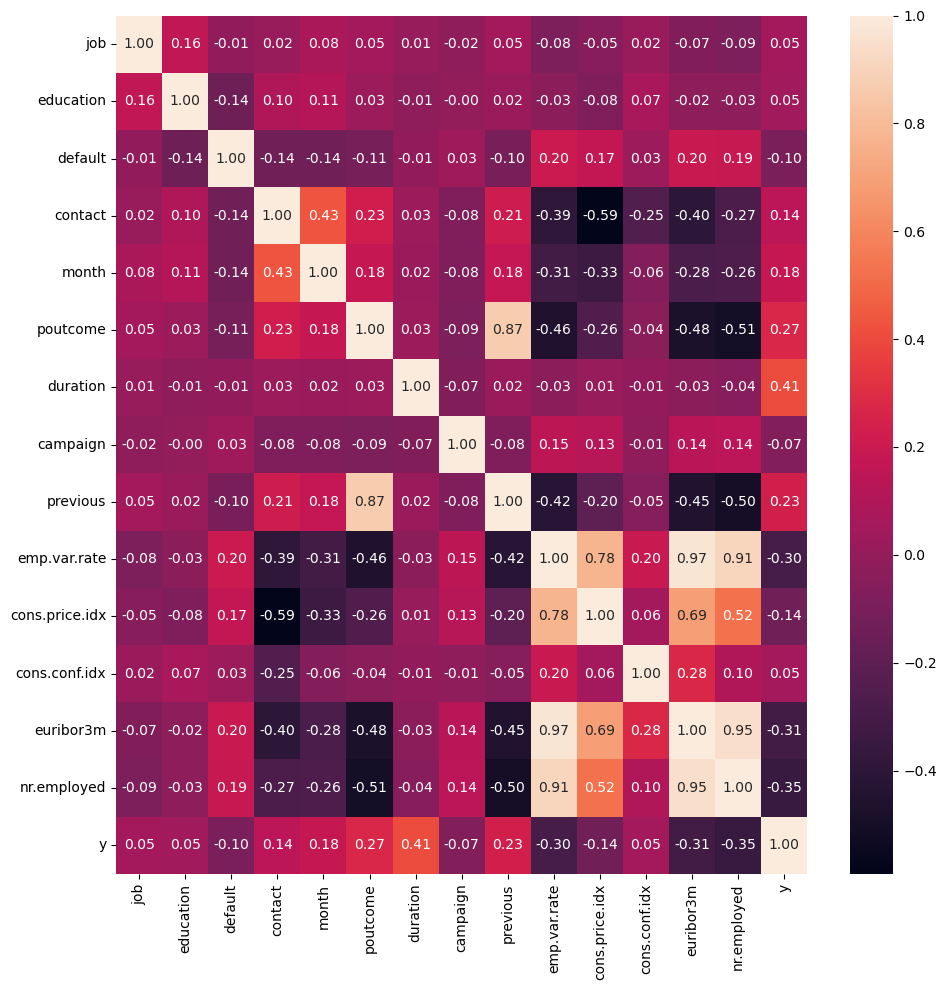

In [30]:
fig, axes = plt.subplots(figsize=(10, 10))


sns.heatmap(filt_df[['job', 'education', 'default', 'contact',
                      'month', 'poutcome', 'duration', 'campaign', 
                      'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                        'euribor3m', 'nr.employed', 'y']].corr(),
                            annot = True,
                                 fmt = ".2f")


plt.tight_layout()


plt.show()

In [31]:
#sns.pairplot(filt_df, height=3, diag_kind='hist')

## Step 5: Feature engineering

- ### 5.1 Outliers analysis

In [32]:
# Eliminate irrelevant columns

filt_df.drop(["job", "education", "default", "campaign"],
                    axis = "columns",
                        inplace = True)

In [33]:
total_stats = filt_df.describe()

total_stats

,contact,month,duration,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.634714,2.249951,258.315815,0.173013,0.169953,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,0.481516,2.429157,259.305321,0.494964,0.455811,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,0.000000,0.000000,102.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,1.000000,2.000000,180.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,1.000000,3.000000,319.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,1.000000,9.000000,4918.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


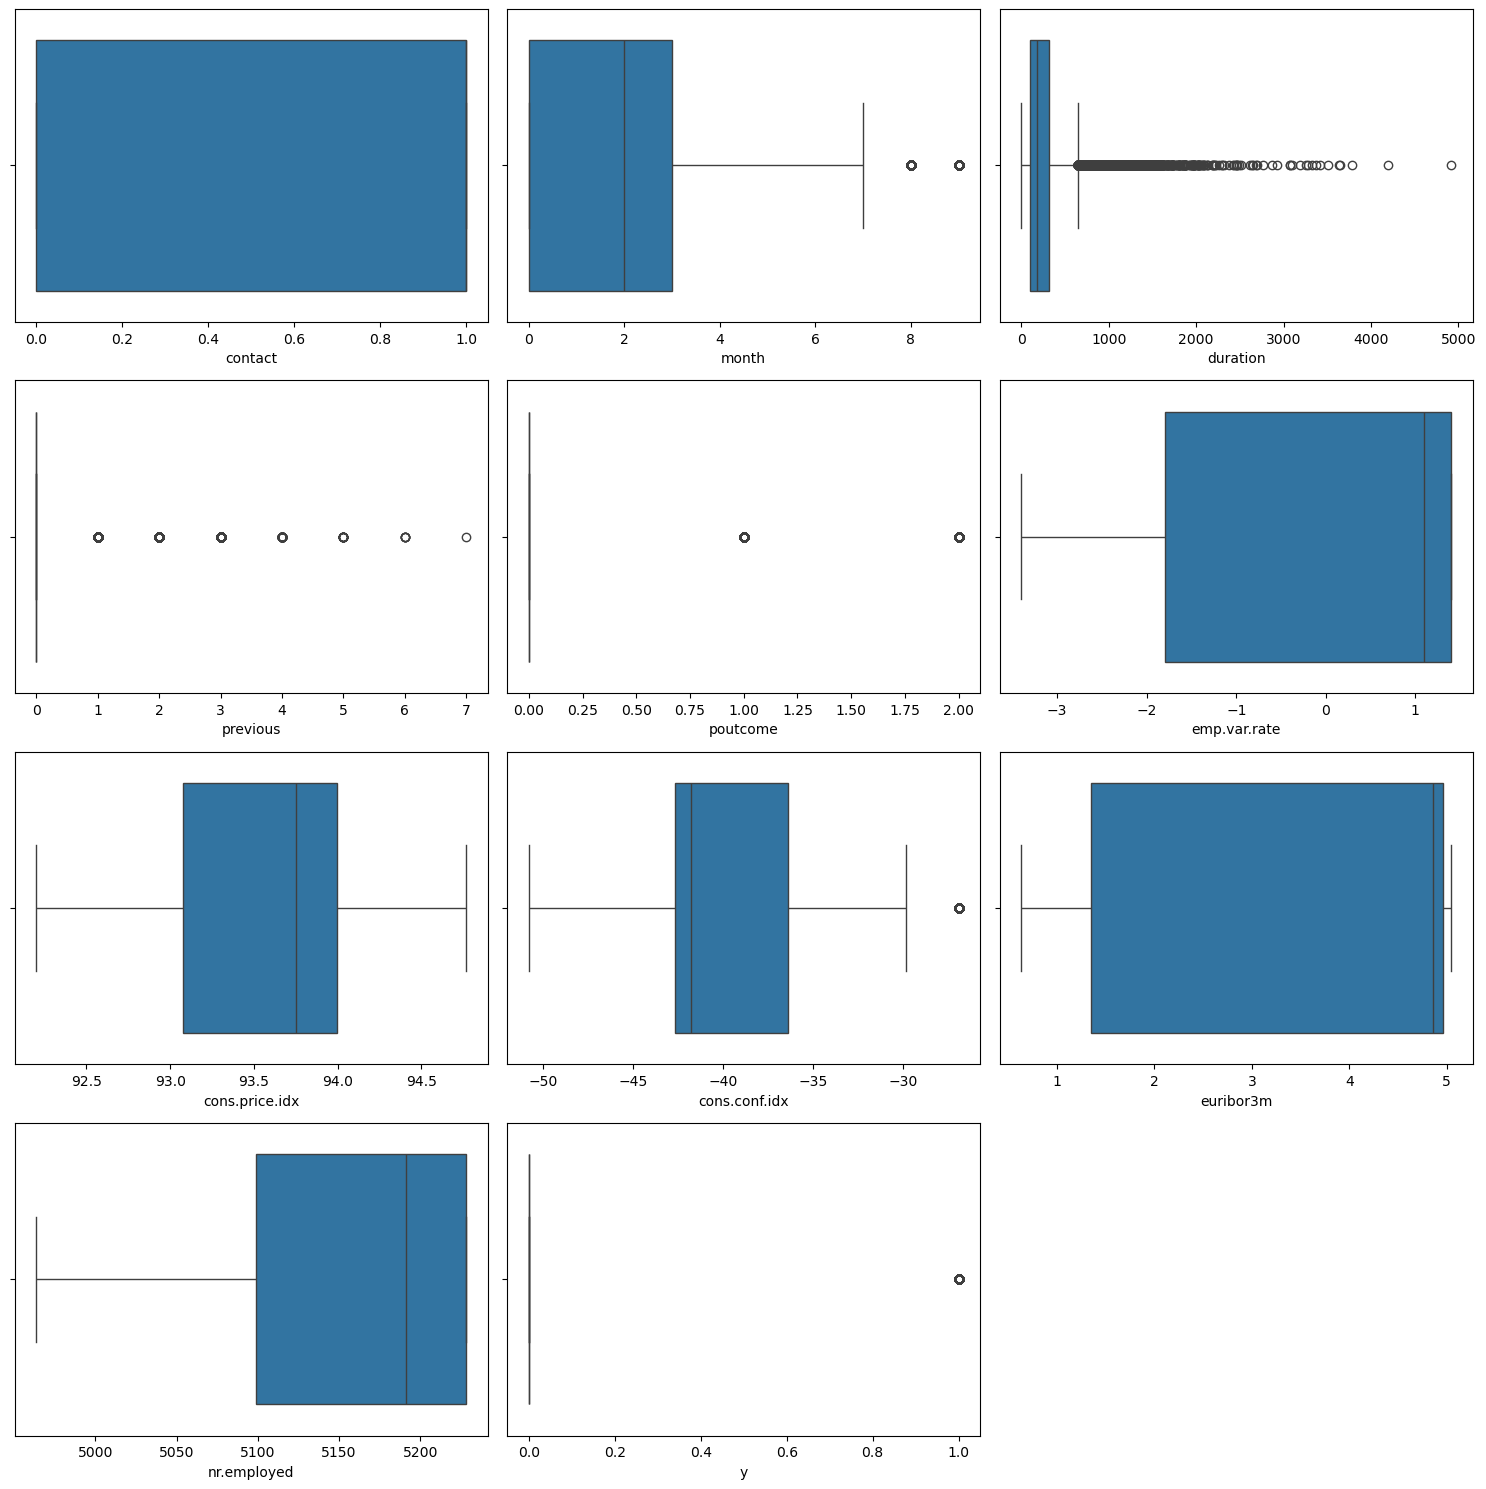

In [34]:
fig, axes = plt.subplots(4, 3, figsize = (15, 15))


sns.boxplot(ax = axes[0, 0],
                data = filt_df,
                    x = "contact")
sns.boxplot(ax = axes[0, 1],
                data = filt_df,
                    x = "month")
sns.boxplot(ax = axes[0, 2],
                data = filt_df,
                    x = "duration")


sns.boxplot(ax = axes[1, 0],
                data = filt_df,
                    x = "previous")
sns.boxplot(ax = axes[1, 1],
                data = filt_df, 
                    x = "poutcome")
sns.boxplot(ax = axes[1, 2],
                data = filt_df, 
                    x = "emp.var.rate")


sns.boxplot(ax = axes[2, 0],
                data = filt_df,
                     x = "cons.price.idx")
sns.boxplot(ax = axes[2, 1],
                data = filt_df, 
                    x = "cons.conf.idx")
sns.boxplot(ax = axes[2, 2],
                data = filt_df,
                     x = "euribor3m")


sns.boxplot(ax = axes[3, 0],
                data = filt_df, 
                    x = "nr.employed")
sns.boxplot(ax = axes[3, 1],
                data = filt_df,
                     x = "y")

# Remove the empty axes
fig.delaxes(ax = axes[3,2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- ### 5.2 Upper and lower limits of outliers variables --> Json saving

In [35]:
def def_outliers(total_stats, variable, json_file):

    individual_stats = total_stats[variable] # Save the stats for IQR

    iqr = individual_stats["75%"] - individual_stats["25%"]
    upper_limit = individual_stats["75%"] + (2 * iqr) 
    lower_limit = individual_stats["25%"] - (2 * iqr)

    if (lower_limit < 0): lower_limit = 0

    print(f"\nThe upper_limit of Variable {variable} is {round(upper_limit, 3)}, the lower_limit is {round(lower_limit, 3)} and the IQR is {round(iqr, 3)}")
    print('                      ==========================================                  ')
    with open(json_file, "w") as f:
        json.dump({
            "upper_limit": upper_limit,
            "lower_limit": lower_limit
        }, f)

In [36]:
def_outliers(total_stats, "month", "../data/interim/outliers_month.json")
def_outliers(total_stats, "duration", "../data/interim/outliers_duration.json")

def_outliers(total_stats, "previous", "../data/interim/outliers_previous.json")
def_outliers(total_stats, "poutcome", "../data/interim/outliers_poutcome.json")

def_outliers(total_stats, "cons.conf.idx", "../data/interim/outliers_cons.conf.idx.json")
def_outliers(total_stats, "y", "../data/interim/outliers_y.json")


The upper_limit of Variable month is 9.0, the lower_limit is 0 and the IQR is 3.0

The upper_limit of Variable duration is 753.0, the lower_limit is 0 and the IQR is 217.0

The upper_limit of Variable previous is 0.0, the lower_limit is 0.0 and the IQR is 0.0

The upper_limit of Variable poutcome is 0.0, the lower_limit is 0.0 and the IQR is 0.0

The upper_limit of Variable cons.conf.idx is -23.8, the lower_limit is 0 and the IQR is 6.3

The upper_limit of Variable y is 0.0, the lower_limit is 0.0 and the IQR is 0.0


- ### 5.3 Copy 2 DataFrames: with and without outliers

In [37]:
df_with_outliers = filt_df.copy()
df_without_outliers = filt_df.copy()

'''Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'''

'Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'